In [428]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import logging

In [429]:
# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

In [430]:
# Load dataset
df = pd.read_csv('dataset.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [431]:
# Checking for null values and dropping rows with missing values if any
if df.isnull().any().any():
    df = df.dropna()
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [432]:
# Encoding categorical values
label_encode = LabelEncoder()
df['Gender'] = label_encode.fit_transform(df['Gender'])
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [433]:
# Adding additional columns for visualization
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index'] == 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'

df['Status'] = df.apply(convert_status_to_description, axis=1)
df['gender_lbl'] = df['Gender']
df.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,1,174,96,4,Obesity,1
1,1,189,87,2,Normal,1
2,0,185,110,4,Obesity,0
3,0,195,104,3,Overweight,0
4,1,149,61,3,Overweight,1


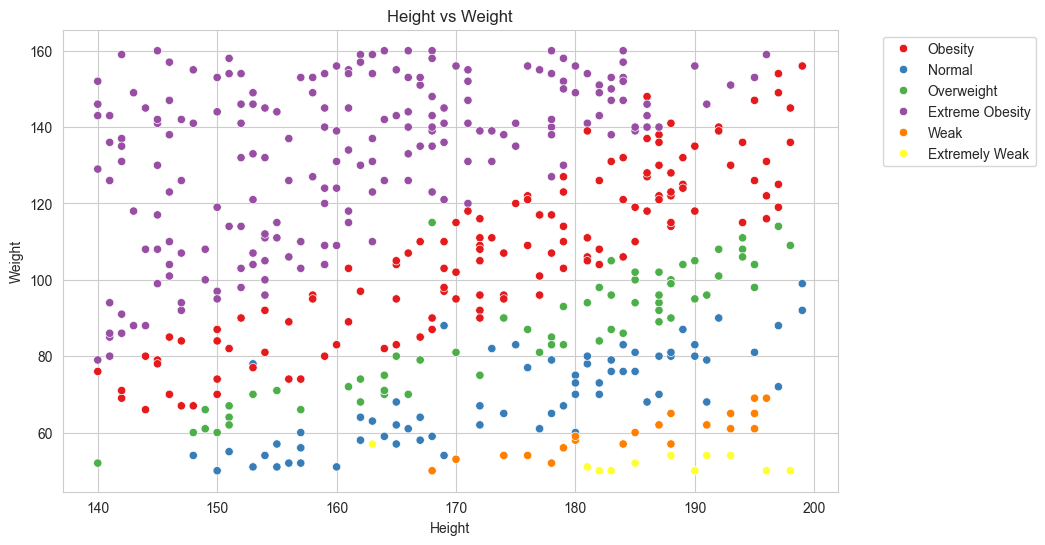

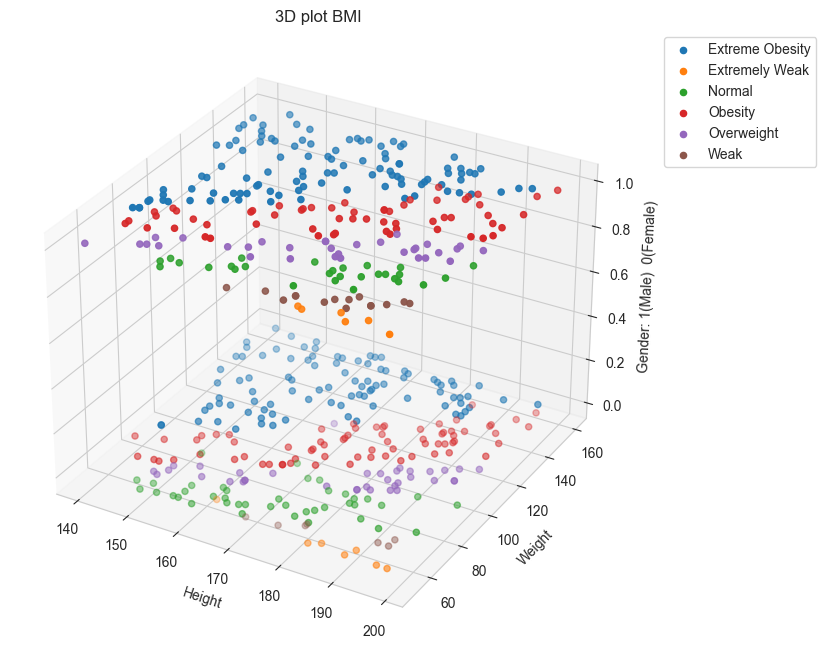

In [434]:
# Data visualization
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Status', palette='Set1', data=df)
plt.title('Height vs Weight')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33']
groups = df.groupby('Status')

for name, group in groups:
    ax.scatter(group.Height, group.Weight, group.gender_lbl, label=name)
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('Gender: 1(Male)  0(Female)')
ax.set_title('3D plot BMI')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

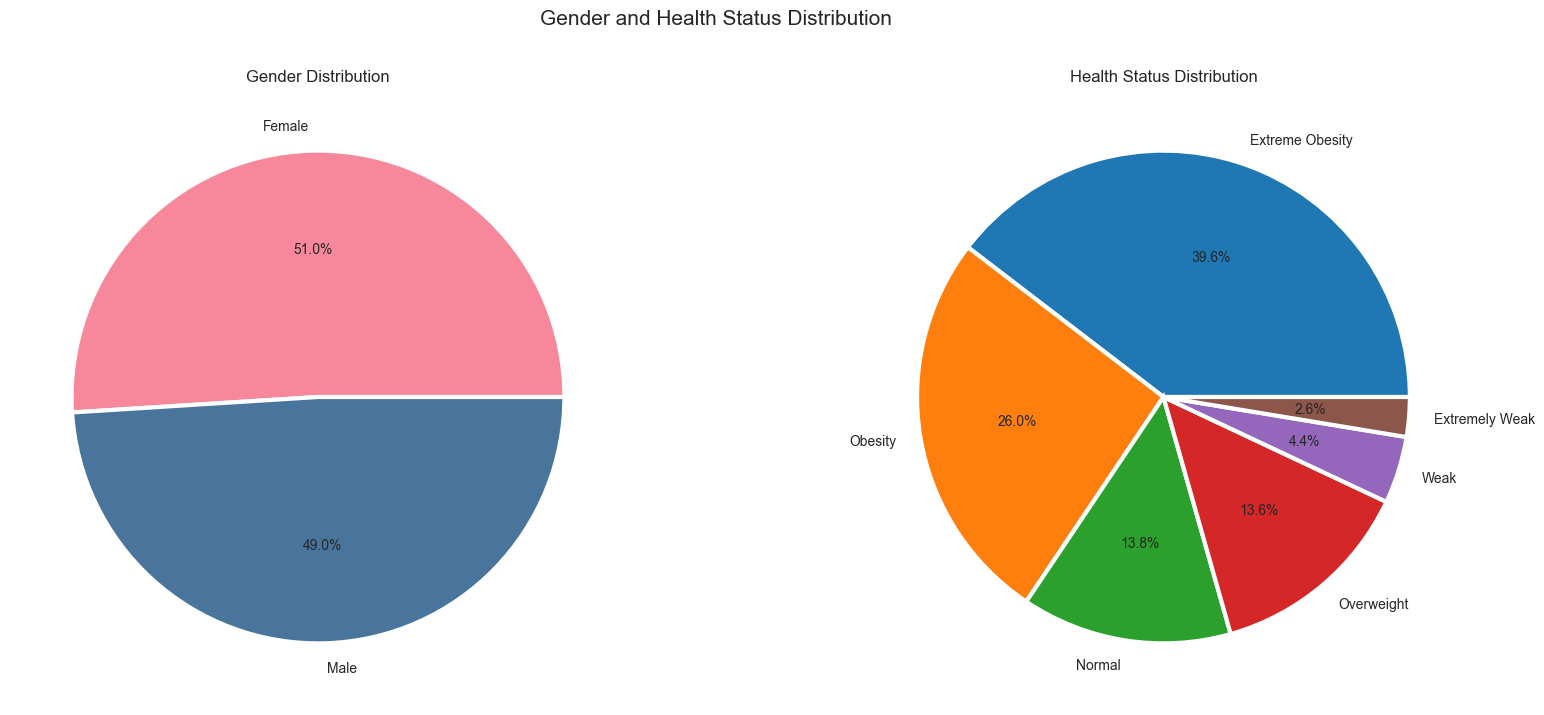

In [435]:
# Pie chart visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
plt.suptitle("Gender and Health Status Distribution", size=15)

# Gender distribution pie chart
axes[0].pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', colors=['#f7879a', '#49759c'], wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
axes[0].set_title('Gender Distribution')

# Health status distribution pie chart
axes[1].pie(df['Status'].value_counts(), labels=df['Status'].value_counts().index, autopct='%1.1f%%', wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
axes[1].set_title('Health Status Distribution')

plt.show()

In [436]:
# Preparing data for machine learning
X = df[['Gender', 'Height', 'Weight']]
y = df['Index']

In [437]:
# One-hot encoding for 'Gender' column
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = ct.fit_transform(X)

In [438]:
# Feature scaling
sc = StandardScaler()
X = sc.fit_transform(X)

In [439]:
df.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,1,174,96,4,Obesity,1
1,1,189,87,2,Normal,1
2,0,185,110,4,Obesity,0
3,0,195,104,3,Overweight,0
4,1,149,61,3,Overweight,1


In [440]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [441]:
# Building TensorFlow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=6, activation='softmax')  # Output layer for 6 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

c:\Users\pavil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [442]:
# Training Athe model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2363 - loss: 1.7210 - val_accuracy: 0.3375 - val_loss: 1.6453
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4787 - loss: 1.5443 - val_accuracy: 0.5500 - val_loss: 1.5042
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6286 - loss: 1.3993 - val_accuracy: 0.5750 - val_loss: 1.3650
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 1.2497 - val_accuracy: 0.6000 - val_loss: 1.2418
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6770 - loss: 1.0793 - val_accuracy: 0.5750 - val_loss: 1.1477
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6896 - loss: 0.9759 - val_accuracy: 0.6375 - val_loss: 1.0662
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.9627 - val_accuracy: 0.6750 - val_loss: 0.9926
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7816 - loss: 0.8074 - val_accuracy: 0.6875 - val_loss

In [443]:
# Evaluating the model
y_pred_tf = np.argmax(model.predict(X_test), axis=-1)
tf_cm = confusion_matrix(y_test, y_pred_tf)
tf_acc = accuracy_score(y_test, y_pred_tf)

print("Confusion Matrix:\n", tf_cm)
print("Accuracy: {:.2f}%".format(tf_acc * 100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Confusion Matrix:
 [[ 1  2  0  0  0  0]
 [ 0  3  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0  1 13  1  0]
 [ 0  0  0  1 30  1]
 [ 0  0  0  0  1 35]]
Accuracy: 90.00%


In [444]:
def health_test_tf(gender, height, weight):
    '''Input gender as Male/Female, height in cm, weight in Kg'''
    try:
        if gender not in ['Male', 'Female']:
            raise ValueError("Gender must be 'Male' atau 'Female'")
        if not (isinstance(height, (int, float)) and height > 0):
            raise ValueError("Height must be a positive number")
        if not (isinstance(weight, (int, float)) and weight > 0):
            raise ValueError("Weight must be a positive number")
        
        # Convert gender to numeric value
        gender_numeric = 1 if gender == 'Male' else 0
        
        individual_data_dict = {'Gender': gender_numeric, 'Height': height, 'Weight': weight}   
        individual_data = pd.DataFrame(data=individual_data_dict, index=[0])
        individual_data = ct.transform(individual_data)
        individual_data = sc.transform(individual_data)
        y_pred = model.predict(individual_data)
        status_dict = {0: 'Extremely Weak', 1: 'Weak', 2: 'Normal', 3: 'Overweight', 4: 'Obesity', 5: 'Extreme Obesity'}
        return status_dict[np.argmax(y_pred)]
    except Exception as e:
        logging.error(f"Error in health_test: {e}")
        return str(e)

In [445]:
# Testing the health_test_tf function with a sample person
sample_person = ['Male', 180, 120]
sample_result = health_test_tf(*sample_person)
print(sample_result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Obesity


In [446]:
# Testing with invalid inputs
print(health_test_tf('Other', 155, 78))  # Invalid gender
print(health_test_tf('Male', -155, 78))  # Invalid height
print(health_test_tf('Male', 155, -78))  # Invalid weight

2024-06-05 12:05:39,718 - ERROR - Error in health_test: Gender must be 'Male' atau 'Female'
2024-06-05 12:05:39,719 - ERROR - Error in health_test: Height must be a positive number
2024-06-05 12:05:39,720 - ERROR - Error in health_test: Weight must be a positive number


Gender must be 'Male' atau 'Female'
Height must be a positive number
Weight must be a positive number


In [447]:
model.save('bmi.h5')

2024-06-05 12:05:39,727 - WARNING - You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


In [448]:
from tensorflow.keras.models import load_model
import joblib

In [449]:
# Simpan LabelEncoder
joblib.dump(label_encode, 'label_encoder.pkl')

['label_encoder.pkl']

In [450]:
# Simpan ColumnTransformer
joblib.dump(ct, 'column_transformer.pkl')

['column_transformer.pkl']

In [451]:
# Simpan ColumnTransformer
joblib.dump(sc, 'standard_scale.pkl')

['standard_scale.pkl']

In [452]:
bmi_model = load_model('bmi.h5')

2024-06-05 12:05:39,844 - WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


In [453]:
# Muat LabelEncoder
label_encode = joblib.load('label_encoder.pkl')

In [454]:
# Muat ColumnTransformer
ct = joblib.load('column_transformer.pkl')

In [455]:
sc = joblib.load('standard_scale.pkl')

In [456]:
print(label_encode.classes_)

['Female' 'Male']


In [457]:
df.head()

,Gender,Height,Weight,Index,Status,gender_lbl
0,1,174,96,4,Obesity,1
1,1,189,87,2,Normal,1
2,0,185,110,4,Obesity,0
3,0,195,104,3,Overweight,0
4,1,149,61,3,Overweight,1


In [458]:
# Prediksi menggunakan model yang dimuat
sample_person = ['Female', 170, 60]
sample_data = np.array([sample_person])
sample_data[:, 0] = label_encode.transform(sample_data[:, 0])  # Encode gender
sample_data = ct.transform(sample_data)
sample_data = sc.transform(sample_data)  # Pastikan sc (StandardScaler) juga dimuat jika Anda menyimpannya saat training
predictions = loaded_model.predict(sample_data)
print(predictions)

c:\Users\pavil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories ['0'] in column 0 during transform